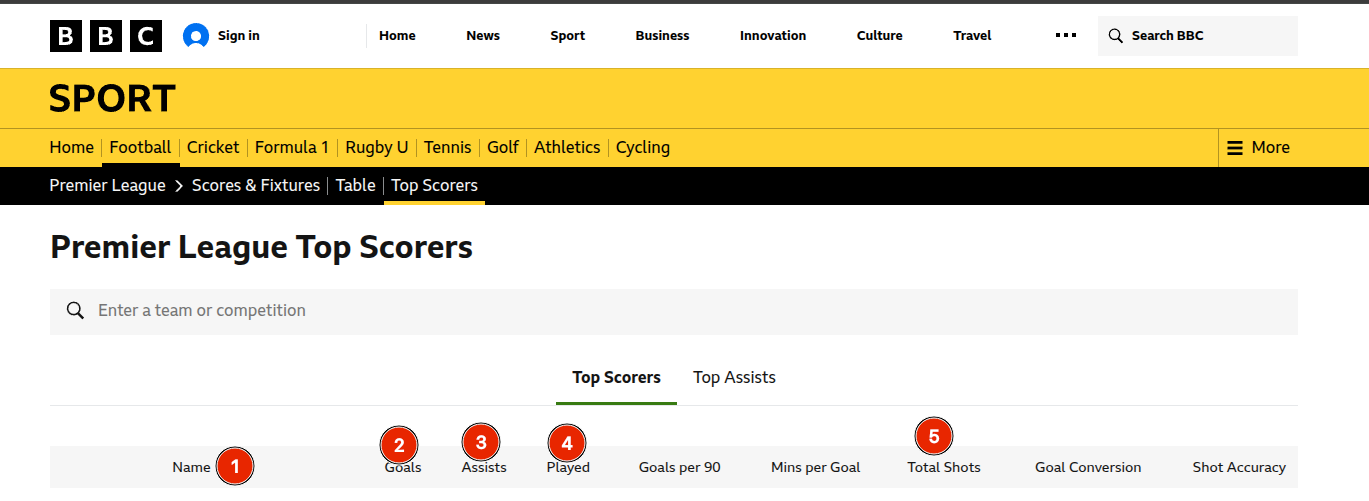

# Scrapping data from above, required column
https://www.bbc.com/sport/football/premier-league/top-scorers

## HTML parsing with Beautiful Soup: A Mini Project
* scrape data from a public website
* organize the data as a dataframe
* export the data as an excel sheet

In [207]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [209]:
url = 'https://www.bbc.com/sport/football/premier-league/top-scorers'


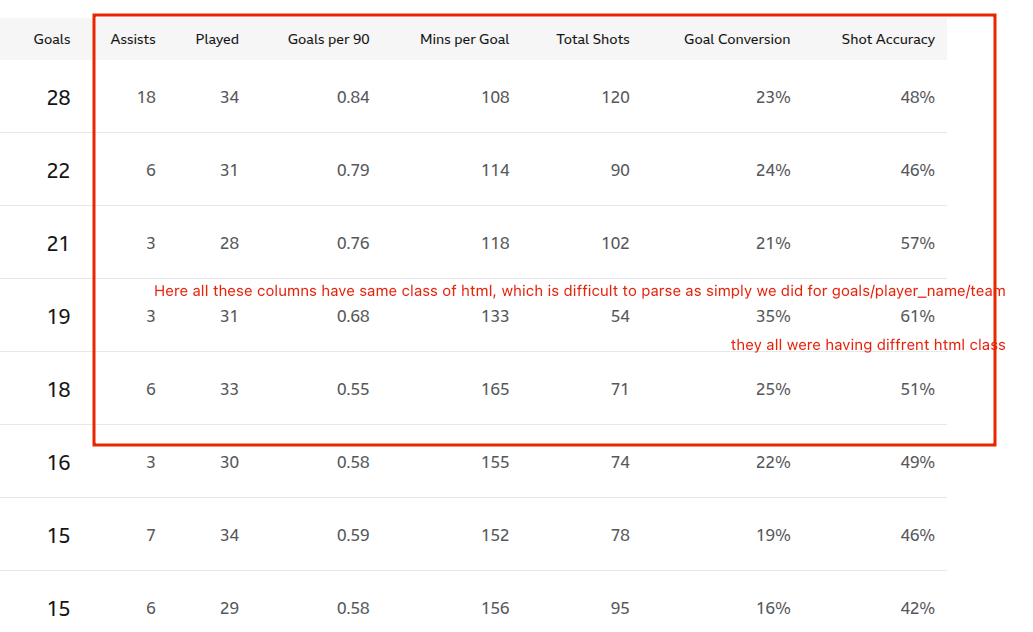

In [218]:
#Required Columns list

player_names = []
team_names = []
goals = []
assists = []
num_matches = []
shots = []


#First we will do request to website with try catch, if we got response correct then we'll apply soup on response

try:
    response = requests.get(url)
    # print(response.raise_for_status())
    response.raise_for_status()
except Exception as e:
    print(e)

else:
    """
    soup = BeautifulSoup(response.text, 'html.parser') we can use this also but for this we have to carefull 
    for encoding scheme for that website, but the response.content do automatically,
    --> response.content this returns the content of website in binary form, which is easy to handle
    """
    soup = BeautifulSoup(response.content, 'html.parser') 
    # print(soup.prettify)

    # ---------------------
    #Looking for the tags from website and passing into the find methode to extract the information
    # print(len(soup.find_all('tbody'))) #it retruns 2 we will be using find methode to target 1st because that's our target table
    # ---------------------

    players = soup.find('tbody').find_all('tr', class_="ssrcss-qqhdqi-TableRowBody e1icz100")
    # print(len(players))
    for player in players:
        # print(player)
        # print(type(player)) # Returns <class 'bs4.element.Tag'>, by apply find on it return lists

        #Targeting column corresponding to each player, extracting the required info

        #1 for player_names
        player_name = player.find('div', class_='ssrcss-m6ah29-PlayerName e1n8xy5b1').get_text(strip=True)
        # print(player_name)
        player_names.append(player_name)


        #2 for team_names
        team_name = player.find('div', class_='ssrcss-qvpga1-TeamsSummary e1n8xy5b0').get_text(strip=True)
        # print(team_name)
        team_names.append(team_name)


         #3 for goals
        goal_scored = int(player.find('div', class_='ssrcss-8k20kk-CellWrapper ef9ipf0').get_text(strip=True))
        # print(type(goal_scored))
        goals.append(goal_scored)

    # ---------------------

        """
        See the screenshot exist before this cells
        Now we are having multiple columns with same classname like = 'ssrcss-150z8d-CellWrapper ef9ipf0'
        
        Strategy:

        Gathering all div's having this class name and the find methode returns the string right, by using that we can 
        keep only those columns by targeting their indexes 
        """

        same_class_divs = player.find_all('div', 'ssrcss-150z8d-CellWrapper ef9ipf0')
        stats = same_class_divs  #just for suitable varibale naming


        #targeting the columns using the indexes
        # print(len(stats)) #there are also some extra divs lets target the divs nicely, last three are comming once

        assists_mode = int(stats[0].get_text(strip=True))
        # print(type(assists_mode))

        matches_played = int(stats[2].get_text(strip=True))
        # print(matches_played)


        shots_taken = int(stats[-3].get_text(strip=True))
        # print(shots_taken)
    # ---------------------

        # appending assists_mode, matches_played, shots_taken

        assists.append(assists_mode)
        num_matches.append(matches_played)
        shots.append(shots_taken)
        
        # break

    """
    Now all required data/paresed data got stored in dataframe(pandas dataframe)
    """

    data = {
		'player': player_names,
		'team': team_names,
		'matches': num_matches,
		'goals': goals,
		'assists': assists,
		'shots': shots
	}

    df_players = pd.DataFrame(data)


In [220]:
df_players

,player,team,matches,goals,assists,shots
0,Mohamed Salah,Liverpool,34,28,18,120
1,A. Isak,Newcastle,31,22,6,90
2,E. Haaland,Man City,28,21,3,102
3,C. Wood,Nottm Forest,31,19,3,54
4,B. Mbeumo,Brentford,33,18,6,71
5,Y. Wissa,Brentford,30,16,3,74
6,O. Watkins,Aston Villa,34,15,7,78
7,Matheus Cunha,Wolves,29,15,6,95
8,C. Palmer,Chelsea,33,14,8,115
9,J. Mateta,Crystal Palace,33,14,2,62


In [222]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   player   28 non-null     object
 1   team     28 non-null     object
 2   matches  28 non-null     int64 
 3   goals    28 non-null     int64 
 4   assists  28 non-null     int64 
 5   shots    28 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


In [224]:
df_players.describe()

,matches,goals,assists,shots
count,28.000000,28.000000,28.000000,28.000000
mean,30.714286,12.928571,4.857143,70.642857
std,2.979649,4.883294,3.182292,22.440397
min,21.000000,9.000000,1.000000,39.000000
25%,29.000000,9.000000,3.000000,53.000000
50%,31.000000,11.500000,4.000000,63.500000
75%,33.000000,15.000000,6.000000,80.000000
max,34.000000,28.000000,18.000000,120.000000


In [232]:
#exporting into a axcelshee/csv
df_players.to_excel('EPL Top Scorers.xlsx', index=False)
